In [14]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# Rotations

80/10/10 Split, 30 epochs

Expansion Factor: 2

## Index
0. degrees
1. top-1 accuracy
2. top-5 accuracy
3. last val loss
4. last val accuracy

In [15]:
standard_res = [20.88, 48.24, 3.34, 25.25]
flipped_res = [44.84, 72.45, 2.84, 49.02]

rot_results = np.array([
    [1, 44.6, 71.34, 2.84, 48.71],
    [5, 46.45, 73.5, 2.85, 47.61],
    [10, 45.71, 72.64, 2.93, 45.89],
    [20, 42.12, 70.41, 2.95, 40.99],
    [30, 28.17, 56.52, 3.44, 30.58],
    [40, 25.08, 51.33, 3.46, 28.37]
])

rot_batch256_results = np.array([
    [5, 32.43, 60.9, 3.35, 34.77]
])

# All

Flip, rotate both ways, flip both rotations

Expansion Factor: 6

## Index
0. degrees
1. top-1 accuracy
2. top-5 accuracy
3. last val loss
4. last val accuracy

In [19]:
all_results = np.array([
    [5, 53.24, 79.49, 2.69, 55.64]
])

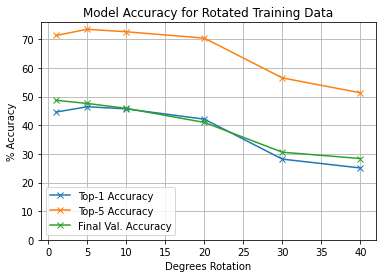

In [17]:
plt.plot(rot_results[:, 0], rot_results[:, 1], 'x-', label="Top-1 Accuracy")
plt.plot(rot_results[:, 0], rot_results[:, 2], 'x-', label="Top-5 Accuracy")
plt.plot(rot_results[:, 0], rot_results[:, 4], 'x-', label="Final Val. Accuracy")

plt.ylim(0)

plt.title('Model Accuracy for Rotated Training Data')
plt.ylabel('% Accuracy')
plt.xlabel('Degrees Rotation')

plt.legend()
plt.grid()
plt.show()

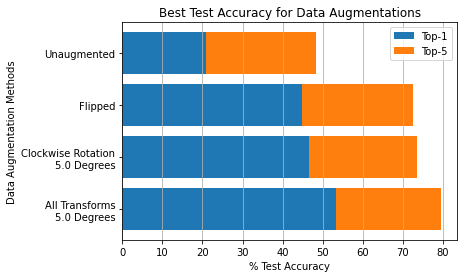

In [21]:
best_results = [standard_res, flipped_res]
best_labels = ['Unaugmented\nExpansion Factor: 1', 'Flipped\nExpansion Factor: 2']

# Clockwise Rotation
b_clock = rot_results[np.argmax(rot_results[:, 1])]
best_results.append(b_clock[1:])
best_labels.append(f'Clockwise Rotation\n{b_clock[0]} Degrees\nExpansion Factor: 2')

best_results.append(all_results[0, 1:])
best_labels.append(f'All Transforms\n{all_results[0, 0]} Degrees\nExpansion Factor: 6')

best_results = best_results[::-1]
best_labels = best_labels[::-1]

plt.barh(range(len(best_labels)), [i[0] for i in best_results], tick_label=best_labels, label='Top-1')
plt.barh(range(len(best_labels)), [i[1] - i[0] for i in best_results], tick_label=best_labels, label='Top-5', left=[i[0] for i in best_results])

plt.legend()
plt.grid(axis='x')
plt.title('Best Test Accuracy for Data Augmentations')
plt.xlabel('% Test Accuracy')
plt.ylabel('Data Augmentation Methods')
plt.show()